In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pkg_resources
pkg_resources.require("simpful==2.8.0")
from simpful import *

In [71]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



## Define Inputs and Output
1. Inputs
- Number of vehs in the last 2 minutes
- Number of Pedestrians in the last 2 minutes
- Hours of the day
- Week-end or Weekday 
2. Output
- Duration of the veh green light

## Context of the problem

The crossroad is located in the city center. As a consequence, many vehs come and go during rush hour, however priority is generally given to pedestrians.

In [72]:
# Define fuzzy sets and linguistic variables 

np_low = FuzzySet(function=Trapezoidal_MF(0, 0, 7, 10), term = "low")
np_average = FuzzySet(function=Trapezoidal_MF(8, 12, 17, 20), term = "average")
np_high = FuzzySet(function=Trapezoidal_MF(18, 25, 30, 30), term = "high")
FS.add_linguistic_variable("nb_pd",LinguisticVariable([np_low, np_average, np_high], concept ="Number of Pedestrians in the last 2 minutes", universe_of_discourse=[0,30]))

nc_low = FuzzySet(function=Trapezoidal_MF(0, 0, 10, 15), term = "low")
nc_average = FuzzySet(function=Trapezoidal_MF(10, 15, 25, 30), term = "average")
nc_high = FuzzySet(function=Trapezoidal_MF(25, 40, 60, 60), term = "high")
FS.add_linguistic_variable("nb_veh",LinguisticVariable([nc_low, nc_average, nc_high], concept = "Number of Vehicles in the last 2 minutes", universe_of_discourse=[0,60]))

h_night = FuzzySet(function=Trapezoidal_MF(0,0,6,7), term = "night")
h_morningpeak = FuzzySet(function=Trapezoidal_MF(6.5, 7, 9, 10), term = "morningpeak")
h_offpeak = FuzzySet(function = Trapezoidal_MF(9.5, 10.5, 16, 17), term = "offpeak")
h_afpeak = FuzzySet(function= Trapezoidal_MF(16.5, 17, 19,20), term = "afpeak")
h_evening = FuzzySet(function = Trapezoidal_MF(19.5, 20.5, 24, 24), term = "evening")
FS.add_linguistic_variable("hour", LinguisticVariable([h_night, h_morningpeak, h_offpeak, h_afpeak, h_evening], concept="Hour of the day", universe_of_discourse=[0,24]))

weekday = FuzzySet(function=Trapezoidal_MF(1,1,5,6), term = "weekday")
weekend = FuzzySet(function=Trapezoidal_MF(5,6,7,7), term = "weekend")
FS.add_linguistic_variable("day", LinguisticVariable([weekday, weekend], concept="Weekday or Weekend", universe_of_discourse=[1,7]))

# Define Output
gl_short = FuzzySet(function=Trapezoidal_MF(5, 5, 10,15), term = "short")
gl_medium = FuzzySet(function=Trapezoidal_MF(12,16,30,35), term = "medium")
gl_long = FuzzySet(function=Trapezoidal_MF(32,36,60,60), term = "long")
FS.add_linguistic_variable("gl_duration", LinguisticVariable([gl_short, gl_medium, gl_long], concept = "Green light duration", universe_of_discourse=[5,60]))

<AxesSubplot: xlabel='Green light duration', ylabel='Membership degree'>

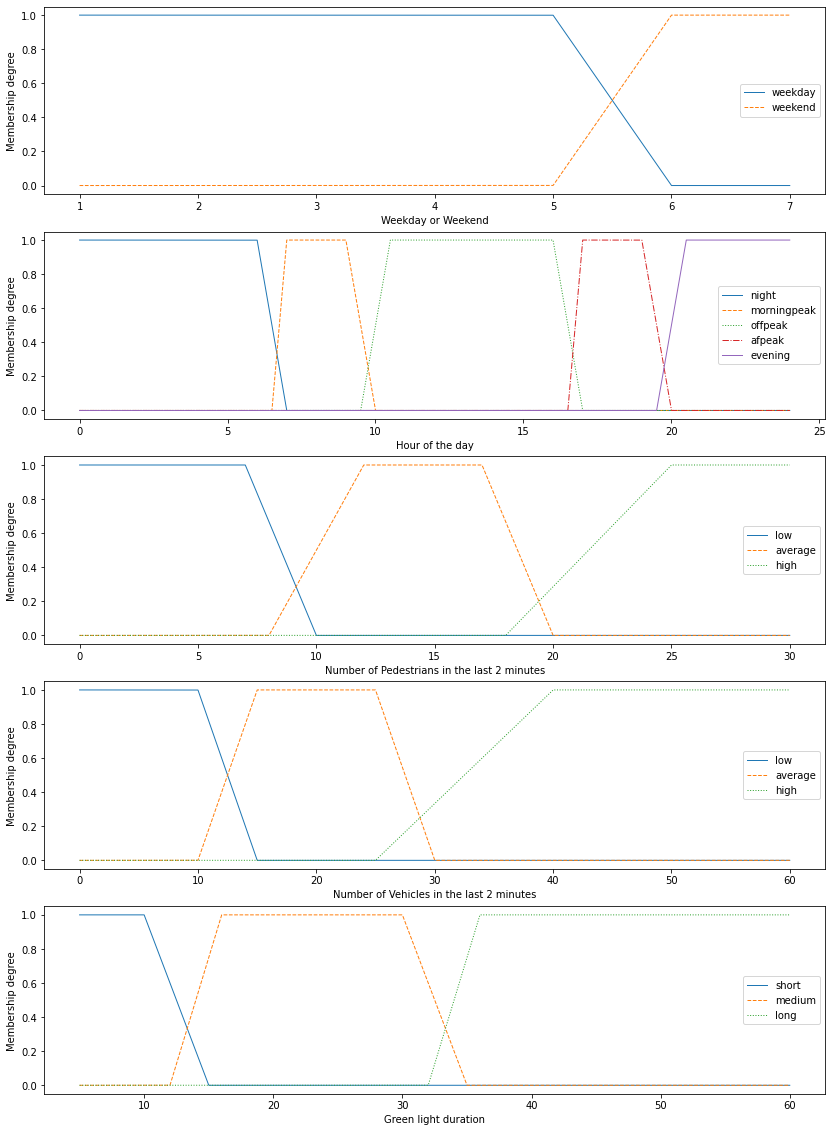

In [73]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, figsize=(14,20))

FS.plot_variable("day",ax = ax1)
FS.plot_variable("hour",ax = ax2)
FS.plot_variable("nb_pd",ax = ax3)
FS.plot_variable("nb_veh",ax = ax4)
FS.plot_variable("gl_duration",ax = ax5)

In [74]:
# General rules
R1 = "IF (nb_veh IS high) OR (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 1.0"
R2 = "IF (nb_pd IS high) OR (nb_veh IS low) THEN (gl_duration IS short) WEIGHT 1.0"

# With only traffic information
R3 = "IF (nb_veh IS low) AND (nb_pd IS low) THEN (gl_duration IS average) WEIGHT 1.0"
R4 = "IF (nb_veh IS low) AND (nb_pd IS average) THEN (gl_duration IS short) WEIGHT 0.8"
R5 = "IF (nb_veh IS low) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 1.0"
R6 = "IF (nb_veh IS average) AND (nb_pd IS low) THEN (gl_duration IS average) WEIGHT 1.0"
R7 = "IF (nb_veh IS average) AND (nb_pd IS average) THEN (gl_duration IS average) WEIGHT 1.0"
R8 = "IF (nb_veh IS average) AND (nb_pd IS high) THEN (gl_duration IS average) WEIGHT 1.0"
R9 = "IF (nb_veh IS high) AND (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 1.0"
R10 = "IF (nb_veh IS high) AND (nb_pd IS average) THEN (gl_duration IS average) WEIGHT 0.8"
R11 = "IF (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS average) WEIGHT 1.0"

# With only time information
R12 = "IF (hour IS night) THEN (gl_duration IS long) WEIGHT 1.0"
R13 = "IF (hour IS morningpeak) OR (hour IS afpeak) THEN (gl_duration IS long) WEIGHT 1.0" 
R14 = "IF (hour IS offpeak) THEN (gl_duration IS short) WEIGHT 0.8" 
R15 = "IF (hour IS evening) THEN (gl_duration IS medium) WEIGHT 1.0" 

# Weekday rules
# With only traffic information
R710 = "IF (nb_veh IS average) AND (nb_pd IS average) THEN (gl_duration IS short) WEIGHT 0.8"
R810 = "IF (nb_veh IS average) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 0.6"

# Night rules
R16 = "IF (day IS weekday) AND (hour IS night) AND (NOT(nb_pd IS high)) THEN (gl_duration IS long) WEIGHT 0.8"
R17 = "IF (day IS weekday) AND (hour IS night) AND (NOT(nb_veh IS low)) THEN (gl_duration IS long) WEIGHT 1.0" 

# Morning Peak / Afternoon peak rules
R18 = "IF (day IS weekday) AND ((hour IS morningpeak) OR (hour IS afpeak)) THEN (gl_duration IS long) WEIGHT 1.0"
R19 = "IF (day IS weekday) AND ((hour IS morningpeak) OR (hour IS afpeak)) AND (nb_veh IS low) THEN (gl_duration IS medium) WEIGHT 1.0" #still peak hour so the objective is to keep fluid traffic
R20 = "IF (day IS weekday) AND ((hour IS morningpeak) OR (hour IS afpeak)) AND (NOT(nb_veh IS low)) THEN (gl_duration IS long) WEIGHT 1.0" 
R21 = "IF (day IS weekday) AND ((hour IS morningpeak) OR (hour IS afpeak)) AND (NOT(nb_pd IS low)) THEN (gl_duration IS medium) WEIGHT 1.0"

# Offpeak rules
R22 = "IF (day IS weekday) AND (hour IS offpeak) THEN (gl_duration IS short) WEIGHT 1.0" 
R23 = "IF (day IS weekday) AND (hour IS offpeak) AND (nb_veh IS high) THEN (gl_duration IS medium) WEIGHT 1.0"
R24 = "IF (day IS weekday) AND (hour IS offpeak) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 1.0"
R25 = "IF (day IS weekday) AND (hour IS offpeak) AND (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 1.0"
R26 = "IF (day IS weekday) AND (hour IS offpeak) AND (nb_veh IS low) AND (nb_pd IS low) THEN (gl_duration IS short) WEIGHT 1.0"
R262 = "IF (day IS weekday) AND (hour IS offpeak) AND (nb_veh IS high) AND (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 0.8"

# Evening rules
R27 = "IF (day IS weekday) AND (hour IS evening) THEN (gl_duration IS medium) WEIGHT 1.0" 
R28 = "IF (day IS weekday) AND (hour IS evening) AND (nb_veh IS high) THEN (gl_duration IS medium) WEIGHT 1.0"
R29 = "IF (day IS weekday) AND (hour IS evening) AND (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS medium) WEIGHT 1.0"
R30 = "IF (day IS weekday) AND (hour IS evening) AND (nb_veh IS low) AND (nb_pd IS low) THEN (gl_duration IS medium) WEIGHT 1.0"
R31 = "IF (day IS weekday) AND (hour IS evening) AND (nb_pd IS high) AND (NOT(nb_veh IS low)) THEN (gl_duration IS medium) WEIGHT 1.0"
R32 = "IF (day IS weekday) AND (hour IS evening) AND (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 1.0"

# Weekend rules
# With only traffic information

R611 = "IF (day IS weekend) AND (nb_veh IS average) AND (nb_pd IS low) THEN (gl_duration IS short) WEIGHT 0.9"
R811 = "IF (day IS weekend) AND (nb_veh IS average) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 1.0"
R911 = "IF (day IS weekend) AND (nb_veh IS high) AND (nb_pd IS low) THEN (gl_duration IS average) WEIGHT 0.5"
R1111 = "IF (day IS weekend) AND (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 0.8"

# Night rules
R33 = "IF (day IS weekend) AND (hour IS night) AND (NOT(nb_pd IS low)) THEN (gl_duration IS short) WEIGHT 0.8"
R34 = "IF (day IS weekend) AND (hour IS night) AND (NOT(nb_veh IS low)) THEN (gl_duration IS medium) WEIGHT 0.8" 

# Morning Peak rules
R35 = "IF (day IS weekend) AND (hour IS morningpeak) THEN (gl_duration IS medium) WEIGHT 1.0" #no morning peak on weekend
R36 = "IF (day IS weekend) AND (hour IS morningpeak) AND (nb_veh IS low) THEN (gl_duration IS short) WEIGHT 1.0" 
R37 = "IF (day IS weekend) AND (hour IS morningpeak) AND (NOT(nb_pd IS low)) THEN (gl_duration IS short) WEIGHT 1.0"
R38 = "IF (day IS weekend) AND (hour IS morningpeak) AND (nb_veh IS low) AND (NOT(nb_pd IS low)) THEN (gl_duration IS short) WEIGHT 1.0" 


# Offpeak rules
R39 = "IF (day IS weekend) AND (hour IS offpeak) THEN (gl_duration IS medium) WEIGHT 1.0"
R40 = "IF (day IS weekend) AND (hour IS offpeak) AND (nb_veh IS average) THEN (gl_duration IS medium) WEIGHT 1.0"
R41 = "IF (day IS weekend) AND (hour IS offpeak) AND (nb_veh IS high) THEN (gl_duration IS long) WEIGHT 1.0"
R42 = "IF (day IS weekend) AND (hour IS offpeak) AND (NOT(nb_pd IS low)) THEN (gl_duration IS short) WEIGHT 1.0"
R43 = "IF (day IS weekend) AND (hour IS offpeak) AND (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS short) WEIGHT 0.8" # again priority to pedestrians
R44 = "IF (day IS weekend) AND (hour IS offpeak) AND (nb_veh IS low) AND (nb_pd IS low) THEN (gl_duration IS medium) WEIGHT 0.8"

# Afternoon peak rules
R45 = "IF (day IS weekend) AND (hour IS afpeak) THEN (gl_duration IS long) WEIGHT 1.0"
R46 = "IF (day IS weekend) AND (hour IS afpeak) AND (nb_veh IS low) THEN (gl_duration IS medium) WEIGHT 0.7" #still peak hour so the objective is to keep fluid traffic
R47 = "IF (day IS weekend) AND (hour IS afpeak) AND (NOT(nb_veh IS low)) THEN (gl_duration IS long) WEIGHT 1.0" 
R48 = "IF (day IS weekend) AND (hour IS afpeak) AND (NOT(nb_pd IS low)) THEN (gl_duration IS short) WEIGHT 0.8"

# Evening rules
R49 = "IF (day IS weekend) AND (hour IS evening) THEN (gl_duration IS medium) WEIGHT 1.0" 
R50 = "IF (day IS weekend) AND (hour IS evening) AND (nb_veh IS high) THEN (gl_duration IS long) WEIGHT 1.0"
R51 = "IF (day IS weekend) AND (hour IS evening) AND (nb_veh IS high) AND (nb_pd IS high) THEN (gl_duration IS medium) WEIGHT 1.0"
R52 = "IF (day IS weekend) AND (hour IS evening) AND (nb_veh IS low) AND (nb_pd IS low) THEN (gl_duration IS medium) WEIGHT 1.0"
R53 = "IF (day IS weekend) AND (hour IS evening) AND (nb_pd IS high) AND (NOT(nb_veh IS low)) THEN (gl_duration IS medium) WEIGHT 1.0"
R54 = "IF (day IS weekend) AND (hour IS evening) AND (nb_pd IS low) THEN (gl_duration IS long) WEIGHT 1.0"

# R14 = "IF (hour IS offpeak) AND (nb_veh IS high) THEN (gl_duration IS short) WEIGHT 0.8" # priority for pedestrians 
# R15 = "IF (hour IS evening) AND (nb_veh IS high) AND (NOT(nb_pd IS high)) THEN (gl_duration IS long) WEIGHT 1.0"

FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R20, R21, R22, R23, R24, R25, R26, R27, R28, R29, R30, R31, R32, R33, R34, R35, R36, R37, R38, R39, R40, R41, R42, R43, R44, R45, R46, R47, R48, R49, R50, R51, R52, R53, R54, R262, R611,R811,R911, R1111, R710, R810]) # , R2, R3,R4, R5, R6, R7, R8

In [75]:
def test_fuzz(nb_pd, nb_veh, hour, day):
    if(type(nb_pd)== int and type(nb_veh)== int and type(day)== int and type(hour)== int) :
        if (nb_pd > 30 or nb_pd < 0) :
            print("Invalid Values")

        elif (nb_veh > 60 or nb_veh < 0) :
            print("Invalid Values")
        
        elif (hour > 24 or nb_veh < 0) :
            print("Invalid Values")

        elif (day > 7 or nb_veh < 1) :
            print("Invalid Values")
        
        else: 
            FS.set_variable("nb_pd", nb_pd)
            FS.set_variable("nb_veh", nb_veh)
            FS.set_variable("hour", hour)
            FS.set_variable("day", day)
            print(FS.Mamdani_inference(["gl_duration"]))
    else: 
        print('Invalid Values')

In [80]:
#Afternoon peak with a lot of pedestrians and few vehs

test_fuzz("iu",6,18,3)

Invalid Values


In [77]:
#Lunch on weekday a lot pedestrian few vehs

test_fuzz(27,8,13,4)

{'gl_duration': 8.874650800033878}


In [78]:
#Weekend morning priority to pedestrians

test_fuzz(9,18,11,7)

{'gl_duration': 26.25448402423332}


In [79]:
#peak time priority to vehs 

test_fuzz(8,45,7,1)


{'gl_duration': 42.02877996664622}
